# Рабочая тетрадь. Объект DataFrame в Pandas

**Цель работы:** научиться создавать, модифицировать и анализировать данные с помощью объекта `DataFrame` в библиотеке Pandas. В этой тетради мы пройдемся по ключевым темам, рассмотренным в Главе 2, и выполним ряд практических заданий для закрепления материала.

### Подготовка

Перед началом работы, импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np

## Часть 1: Создание DataFrame и базовые операции

DataFrame — это двумерная структура данных, похожая на таблицу в SQL или лист в Excel. Каждая колонка в DataFrame — это объект `Series`.

Создадим наш первый DataFrame, который будет содержать информацию о складских запасах компании. Мы будем использовать список словарей, где каждый словарь представляет одну строку.

In [2]:
data = [
    {'product_id': 23, 'name': 'computer', 'wholesale_price': 500, 'retail_price': 1000, 'sales': 100},
    {'product_id': 96, 'name': 'Python Workout', 'wholesale_price': 35, 'retail_price': 75, 'sales': 1000},
    {'product_id': 97, 'name': 'Pandas Workout', 'wholesale_price': 35, 'retail_price': 75, 'sales': 500},
    {'product_id': 15, 'name': 'banana', 'wholesale_price': 0.5, 'retail_price': 1, 'sales': 200},
    {'product_id': 87, 'name': 'sandwich', 'wholesale_price': 3, 'retail_price': 5, 'sales': 300}
]

df = pd.DataFrame(data)

print("Созданный DataFrame:")
df

Созданный DataFrame:


,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000,100
1,96,Python Workout,35.0,75,1000
2,97,Pandas Workout,35.0,75,500
3,15,banana,0.5,1,200
4,87,sandwich,3.0,5,300


### Задание 1. Выборка одного столбца

Извлеките из `df` столбец `name` и выведите его на экран. Обратите внимание, что результатом будет объект `Series`.

In [3]:
product_names = df['name']
print(product_names)

0          computer
1    Python Workout
2    Pandas Workout
3            banana
4          sandwich
Name: name, dtype: object


### Задание 2. Выборка нескольких столбцов

Создайте новый DataFrame `df_prices`, который будет содержать только столбцы `name`, `wholesale_price` и `retail_price`.

In [4]:
df_prices = df[['name', 'wholesale_price', 'retail_price']]
print(df_prices)

             name  wholesale_price  retail_price
0        computer            500.0          1000
1  Python Workout             35.0            75
2  Pandas Workout             35.0            75
3          banana              0.5             1
4        sandwich              3.0             5


### Задание 3. Добавление нового столбца

В DataFrame `df` часто требуется добавлять новые столбцы на основе существующих данных. Рассчитайте чистую прибыль (profit) для каждого товара по формуле: `(retail_price - wholesale_price)`. Создайте новый столбец `profit` с этими значениями.

In [6]:
df['profit'] = df['retail_price'] - df['wholesale_price']
print(df)

   product_id            name  wholesale_price  retail_price  sales  profit
0          23        computer            500.0          1000    100   500.0
1          96  Python Workout             35.0            75   1000    40.0
2          97  Pandas Workout             35.0            75    500    40.0
3          15          banana              0.5             1    200     0.5
4          87        sandwich              3.0             5    300     2.0


### Задание 4. Расчет общего дохода

Теперь, когда у нас есть прибыль с одной единицы товара, рассчитаем общий доход (`net_revenue`) для каждой позиции. Формула: `profit * sales`. Создайте столбец `net_revenue`.

In [7]:
# Сначала убедимся, что столбец 'profit' существует
if 'profit' not in df.columns:
  df[profit] = df['retail_price'] - df['whosale_price']

df['net_revenue'] = df['profit'] * df['sales']
print(df)

   product_id            name  wholesale_price  retail_price  sales  profit  \
0          23        computer            500.0          1000    100   500.0   
1          96  Python Workout             35.0            75   1000    40.0   
2          97  Pandas Workout             35.0            75    500    40.0   
3          15          banana              0.5             1    200     0.5   
4          87        sandwich              3.0             5    300     2.0   

   net_revenue  
0      50000.0  
1      40000.0  
2      20000.0  
3        100.0  
4        600.0  


## Часть 2. Индексация и условная выборка

Pandas предоставляет мощные инструменты для выборки данных по индексам и условиям. Наиболее популярные из них — `.loc` (выборка по меткам) и `.iloc` (выборка по числовым позициям).

### Задание 5. Выборка строки по индексу с помощью `.loc`

По умолчанию, Pandas присваивает числовые индексы от 0. Выведите всю информацию о товаре с индексом `2` (Pandas Workout).

In [10]:
print(df.loc[2])

product_id                     97
name               Pandas Workout
wholesale_price              35.0
retail_price                   75
sales                         500
profit                       40.0
net_revenue               20000.0
Name: 2, dtype: object


### Задание 6. Условная выборка (фильтрация)

Часто нужно найти строки, удовлетворяющие определенному условию. Выведите все товары, у которых количество продаж (`sales`) **больше 400**.

In [11]:
high_sales_products = df[df['sales'] > 400]
print(high_sales_products)

   product_id            name  wholesale_price  retail_price  sales  profit  \
1          96  Python Workout             35.0            75   1000    40.0   
2          97  Pandas Workout             35.0            75    500    40.0   

   net_revenue  
1      40000.0  
2      20000.0  


### Задание 7. Фильтрация по нескольким условиям

Найдите все товары, у которых розничная цена (`retail_price`) **меньше 100** И (`&`) количество продаж (`sales`) **больше 250**.

In [12]:
filtered_df = df[(df['retail_price'] < 100) & (df['sales'] > 250)]
print(filtered_df)

   product_id            name  wholesale_price  retail_price  sales  profit  \
1          96  Python Workout             35.0            75   1000    40.0   
2          97  Pandas Workout             35.0            75    500    40.0   
4          87        sandwich              3.0             5    300     2.0   

   net_revenue  
1      40000.0  
2      20000.0  
4        600.0  


### Задание 8. Использование метода `.query()`

Метод `query` позволяет писать условия в виде строки, что может быть более читаемо. Выполните то же самое, что и в Задании 6, но с помощью `.query()`: найдите товары, где `sales > 400`.

In [13]:
high_sales_query = df.query('sales > 400')
print (high_sales_query)

   product_id            name  wholesale_price  retail_price  sales  profit  \
1          96  Python Workout             35.0            75   1000    40.0   
2          97  Pandas Workout             35.0            75    500    40.0   

   net_revenue  
1      40000.0  
2      20000.0  


## Часть 3. Модификация данных и работа с NaN

Данные редко бывают идеальными. В этой части мы научимся обновлять существующие значения и работать с пропущенными данными.

### Задание 9. Обновление значений по условию с помощью `.loc`

Представим, что мы решили сделать скидку на все дорогие товары. Для всех товаров, у которых `retail_price` больше 500, уменьшите `retail_price` на 10%.
**Важно:** для обновления данных по условию всегда используйте `.loc` для избежания `SettingWithCopyWarning`.

In [14]:
# Синтаксис: df.loc[<условие для строк>, <столбец для обновления>] = <новое значение>
df.loc[df['retail_price'] > 500, 'retail_price'] = df['retail_price'] * 0.9
print(df)

   product_id            name  wholesale_price  retail_price  sales  profit  \
0          23        computer            500.0           900    100   500.0   
1          96  Python Workout             35.0            75   1000    40.0   
2          97  Pandas Workout             35.0            75    500    40.0   
3          15          banana              0.5             1    200     0.5   
4          87        sandwich              3.0             5    300     2.0   

   net_revenue  
0      50000.0  
1      40000.0  
2      20000.0  
3        100.0  
4        600.0  


### Задание 10. Объединение DataFrame и появление `NaN`

Дела у магазина пошли в гору, и мы расширяем ассортимент. Создайте новый DataFrame `new_products` с новыми товарами. Затем объедините его с основным `df` с помощью `pd.concat`.

In [15]:
new_data = [
    {'product_id': 24, 'name': 'phone', 'wholesale_price': 200, 'retail_price': 500},
    {'product_id': 16, 'name': 'apple', 'wholesale_price': 0.5, 'retail_price': 1},
    {'product_id': 17, 'name': 'pear', 'wholesale_price': 0.6, 'retail_price': 1.2}
]
new_products = pd.DataFrame(new_data)

# Ваш код для объединения df и new_products
# Результат сохраните в переменную df_combined
df_combined = pd.concat([df, new_products], ignore_index=True)
print(df_combined)
# Обратите внимание на значение NaN в столбцах, которых не было в new_products

   product_id            name  wholesale_price  retail_price   sales  profit  \
0          23        computer            500.0         900.0   100.0   500.0   
1          96  Python Workout             35.0          75.0  1000.0    40.0   
2          97  Pandas Workout             35.0          75.0   500.0    40.0   
3          15          banana              0.5           1.0   200.0     0.5   
4          87        sandwich              3.0           5.0   300.0     2.0   
5          24           phone            200.0         500.0     NaN     NaN   
6          16           apple              0.5           1.0     NaN     NaN   
7          17            pear              0.6           1.2     NaN     NaN   

   net_revenue  
0      50000.0  
1      40000.0  
2      20000.0  
3        100.0  
4        600.0  
5          NaN  
6          NaN  
7          NaN  


### Задание 11. Заполнение пропущенных значений

`NaN` (Not a Number) — стандартное обозначение пропущенных данных в Pandas. Их нужно обрабатывать. Заполните все пропущенные значения (`NaN`) в столбце `sales` нулями. Используйте метод `.fillna()`.

In [17]:
# Ваш код здесь (используйте df_combined из предыдущего задания)
df_combined['sales'] = df_combined['sales'].fillna(0)
print(df_combined)
df_combined = pd.concat([df, new_products], ignore_index=True)
# Не забудьте переприсвоить результат или использовать inplace=True
df_combined = pd.concat([df, new_products], ignore_index=True) # Повторно создаем для чистоты эксперимента


   product_id            name  wholesale_price  retail_price   sales  profit  \
0          23        computer            500.0         900.0   100.0   500.0   
1          96  Python Workout             35.0          75.0  1000.0    40.0   
2          97  Pandas Workout             35.0          75.0   500.0    40.0   
3          15          banana              0.5           1.0   200.0     0.5   
4          87        sandwich              3.0           5.0   300.0     2.0   
5          24           phone            200.0         500.0     0.0     NaN   
6          16           apple              0.5           1.0     0.0     NaN   
7          17            pear              0.6           1.2     0.0     NaN   

   net_revenue  
0      50000.0  
1      40000.0  
2      20000.0  
3        100.0  
4        600.0  
5          NaN  
6          NaN  
7          NaN  


### Задание 12. Агрегирующие функции

Pandas позволяет легко считать общую статистику по данным. Рассчитайте и выведите на экран:
1. Среднюю розничную цену (`mean`).
2. Общую сумму продаж (`sum`).
3. Максимальную чистую прибыль (`max` для столбца `net_revenue`).

In [19]:
# Ваш код здесь
# Используйте оригинальный df с рассчитанным столбцом net_revenue
mean_retail_price = df['retail_price'].mean()
total_sales = df['sales'].sum()

# Убедимся, что столбец net_revenue существует
if 'net_revenue' not in df.columns:
  if 'profit' not in df.columns:
    df['profit'] = df['retail_price'] - df['wholesale_price']
  df['net_revenue'] = df['profit'] * df['sales']

max_net_revenue = df['net_revenue'].max()

print(f"Средняя розничная цена: {mean_retail_price:.2f}")
print(f"Общая сумма продаж: {total_sales}")
print(f"Максимальный чистый доход одного товара: {max_net_revenue}")

Средняя розничная цена: 211.20
Общая сумма продаж: 2100
Максимальный чистый доход одного товара: 50000.0


### Задание 13. Поиск выбросов (Outliers)

Выбросы — это значения, которые сильно отличаются от большинства других. Один из способов их найти — использовать межквартильный размах (IQR).
**Задача:** Найти все товары, чьи продажи (`sales`) являются выбросами в большую сторону.

**Алгоритм:**
1. Рассчитайте 25-й перцентиль (`Q1`).
2. Рассчитайте 75-й перцентиль (`Q3`).
3. Рассчитайте IQR (`Q3 - Q1`).
4. Определите верхнюю границу: `Q3 + 1.5 * IQR`.
5. Выведите все строки, где `sales` превышает верхнюю границу.

In [20]:
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}, Upper Bound={upper_bound}")

outliers = df[df['sales'] > upper_bound]
print('\nТовары-выбросы по продажам:')
print(outliers)

Q1=200.0, Q3=500.0, IQR=300.0, Upper Bound=950.0

Товары-выбросы по продажам:
   product_id            name  wholesale_price  retail_price  sales  profit  \
1          96  Python Workout             35.0            75   1000    40.0   

   net_revenue  
1      40000.0  


---

## Часть 4. Индивидуальные задания для самостоятельной работы

Ниже представлены 30 вариантов заданий. Для их выполнения будет использоваться новый, более крупный набор данных о продажах электроники и бытовой техники. Сначала сгенерируем и посмотрим на эти данные.

In [21]:
# Генерация данных для индивидуальных заданий
np.random.seed(42)
categories = ['Electronics', 'Appliances', 'Accessories', 'Computers']
n_products = 100

store_data = {
    'product_id': np.arange(1001, 1001 + n_products),
    'category': np.random.choice(categories, n_products, p=[0.4, 0.3, 0.2, 0.1]),
    'base_price': np.round(np.random.uniform(50, 2000, n_products), 2),
    'items_sold': np.random.randint(10, 500, n_products),
    'rating': np.round(np.random.uniform(2.5, 5.0, n_products), 1)
}
store_df = pd.DataFrame(store_data)

# Добавляем зависимость цены продажи от базовой цены и рейтинга
store_df['sale_price'] = np.round(store_df['base_price'] * (1 + (store_df['rating'] - 4) / 10), 2)
# Убираем отрицательные цены, если вдруг появятся
store_df['sale_price'] = store_df['sale_price'].clip(lower=0)

print("Пример данных для заданий:")
store_df.head()

Пример данных для заданий:


,product_id,category,base_price,items_sold,rating,sale_price
0,1001,Electronics,111.29,417,3.2,102.39
1,1002,Computers,1291.00,125,3.7,1252.27
2,1003,Accessories,662.99,84,3.4,623.21
3,1004,Appliances,1041.71,122,3.5,989.62
4,1005,Electronics,1819.75,465,4.6,1928.94


### Варианты заданий

**Инструкция:** Выполните задание, соответствующее вашему варианту. Используйте DataFrame `store_df`.

1.  **Вариант 1.** Найдите все товары из категории `Electronics`, у которых `rating` выше 4.5.
2.  **Вариант 2.** Рассчитайте общий доход (`total_revenue`) для каждого товара (`sale_price * items_sold`) и добавьте его как новый столбец.
3.  **Вариант 3.** Найдите 5 самых дорогих товаров по `base_price`. Используйте `.sort_values()` и `.head()`.
4.  **Вариант 4.** Выведите все товары, у которых было продано (`items_sold`) от 100 до 200 единиц (включительно).
5.  **Вариант 5.** Найдите среднюю `sale_price` для каждой `category`. Используйте `.groupby()`.
6.  **Вариант 6.** Выведите товары из категории `Appliances`, у которых `rating` ниже 3.0.
7.  **Вариант 7.** Рассчитайте общую сумму проданных товаров (`items_sold`) для категории `Accessories`.
8.  **Вариант 8.** Найдите товар с максимальным количеством продаж (`items_sold`).
9.  **Вариант 9.** Добавьте столбец `discount`, который равен `base_price - sale_price`.
10. **Вариант 10.** Выведите `product_id`, `category`, `rating` для всех товаров, у которых `base_price` > 1500.
11. **Вариант 11.** Найдите все товары, у которых `sale_price` меньше, чем `base_price`.
12. **Вариант 12.** Посчитайте, сколько товаров в каждой `category`. Используйте `.value_counts()`.
13. **Вариант 13.** Найдите товар с самым низким рейтингом (`rating`) в категории `Computers`.
14. **Вариант 14.** Выведите все товары, у которых `items_sold` больше среднего значения по всему датасету.
15. **Вариант 15.** Для всех товаров категории `Electronics` увеличьте `sale_price` на 5%. Используйте `.loc`.
16. **Вариант 16.** Найдите товары, у которых `product_id` находится в диапазоне от 1050 до 1060.
17. **Вариант 17.** Рассчитайте суммарное количество проданных товаров (`items_sold`) для каждой категории. Используйте `.groupby()`.
18. **Вариант 18.** Найдите товар с минимальной `base_price`.
19. **Вариант 19.** Добавьте столбец `is_popular`, который будет `True`, если `rating > 4.0` и `items_sold > 300`, и `False` в противном случае.
20. **Вариант 20.** Выведите 10 товаров с самым низким рейтингом `rating`. Используйте `.sort_values()` и `.head(10)`.
21. **Вариант 21.** Найдите средний рейтинг (`rating`) для товаров, у которых `base_price` < 200.
22. **Вариант 22.** Выведите все товары из категорий `Electronics` или `Computers`. Используйте метод `.isin()`.
23. **Вариант 23.** Рассчитайте медианное значение `items_sold`.
24. **Вариант 24.** Найдите самый дорогой товар (`base_price`) в категории `Appliances`.
25. **Вариант 25.** Добавьте столбец `price_per_rating_point`, равный `sale_price / rating`.
26. **Вариант 26.** Выведите 5 товаров с наибольшим количеством продаж (`items_sold`).
27. **Вариант 27.** Установите `rating` равным 5.0 для всех товаров, у которых `items_sold` > 450.
28. **Вариант 28.** Найдите, какая категория имеет самую высокую среднюю `base_price`.
29. **Вариант 29.** Выведите товары, у которых `rating` ровно 5.0 или ровно 2.5.
30. **Вариант 30.** Рассчитайте стандартное отклонение (`std`) для столбца `sale_price`.

   product_id     category  base_price  items_sold  rating  sale_price  \
0        1001  Electronics      111.29         417     3.2      102.39   
1        1002    Computers     1291.00         125     3.7     1252.27   
2        1003  Accessories      662.99          84     3.4      623.21   
3        1004   Appliances     1041.71         122     3.5      989.62   
4        1005  Electronics     1819.75         465     4.6     1928.94   

   price_per_rating_point  
0               31.996875  
1              338.451351  
2              183.297059  
3              282.748571  
4              419.334783  


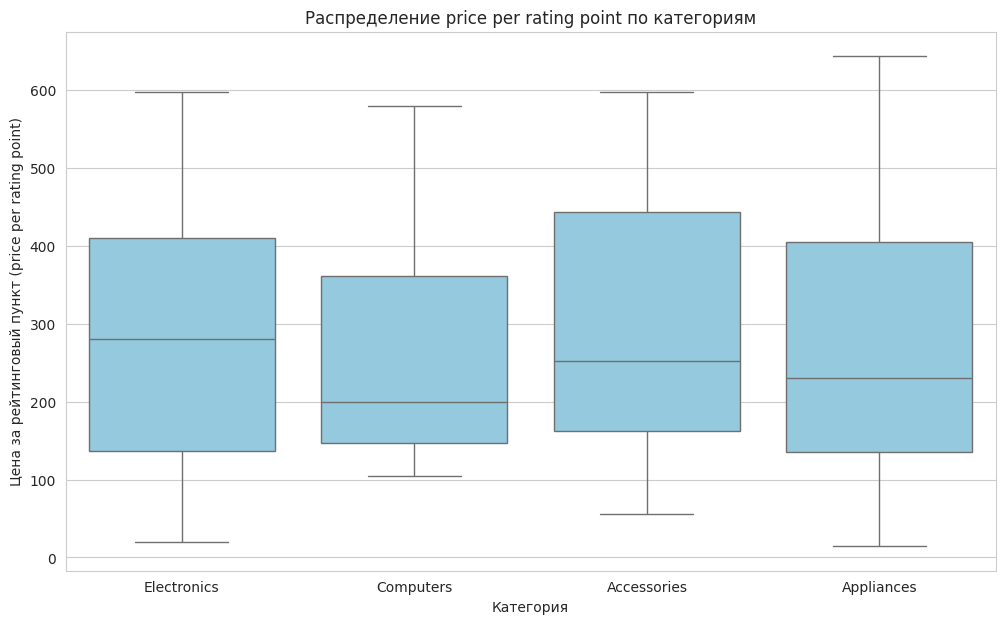

In [31]:
# Поле для выполнения индивидуального задания
# Добавляем импорты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Добавляем зависимость цены продажи от базовой цены и рейтинга
store_df['sale_price'] = np.round(store_df['base_price'] * (1 + (store_df['rating'] - 4) / 10), 2)

# Убираем отрицательные цены, если вдруг появятся
store_df['sale_price'] = store_df['sale_price'].clip(lower=0)

# Вариант 25
# 1. Добавление столбца price_per_rating_point
store_df['price_per_rating_point'] = store_df['sale_price'] / store_df['rating']
print(store_df.head())

# 2. Визуализация
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

# Построим диаграмму "Ящик с усами", отразим нижний квартиль, медиану и верхний квартиль
sns.boxplot(data=store_df, x='category', y='price_per_rating_point', color='skyblue')
plt.xlabel("Категория")
plt.ylabel("Цена за рейтинговый пункт (price per rating point)")
plt.title("Распределение price per rating point по категориям")
plt.show()